<a href="https://colab.research.google.com/github/hufsaim/T10302201/blob/main/notebook/lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy import signal
from IPython.display import Audio

### 녹음한 wav파일을 불러오기
- sampling rate, duration, # of samples 등을 확인하기
- 시간축에 대해 음성신호의 파형을 그려보기
- Audio함수를 이용하여 녹음된 소리를 재생하기


In [2]:
fs, d = wavfile.read('mywav.wav')
print(f"sampling rate: {fs} Hz")
print(f"shape of data: {d.shape}")
mywav = d[:,0]
L = len(d)
print(f"duration of data: {L/fs} s")
print(f"samples of data: {L} samples")

sampling rate: 48000 Hz
shape of data: (433440, 2)
duration of data: 9.03 s
samples of data: 433440 samples


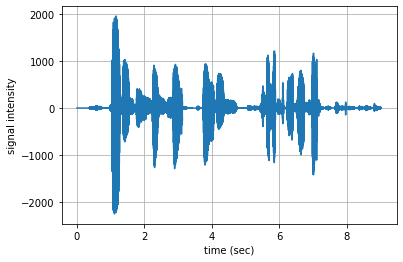

In [3]:
t = np.arange(0,len(mywav))/fs
plt.plot(t,mywav)
plt.xlabel('time (sec)')
plt.ylabel('signal intensity')
plt.grid('on')
plt.show()

In [4]:
Audio(mywav,rate=fs)

### 음계를 나타내는 신호를 생성하기
- 서로 다른 주파수를 가지는 삼각함수를 이용하여 각각의 음에 해당하는 신호들을 생성하기
- 각각의 음을 연결하여 음악소리를 만들고, 재생하여 소리를 확인하기

In [5]:
t1 = np.arange(0,0.5,1/fs) # 1 second
W = signal.windows.tukey(len(t1),alpha = 0.75)
Z = np.zeros(np.shape(t1)) # no singal
C5 = np.sin(2*np.pi*523*t1)*W # 523Hz sine wave
D5 = np.sin(2*np.pi*587*t1)*W
E5 = np.sin(2*np.pi*659*t1)*W
F5 = np.sin(2*np.pi*698*t1)*W
G5 = np.sin(2*np.pi*784*t1)*W
A5 = np.sin(2*np.pi*880*t1)*W
B5 = np.sin(2*np.pi*988*t1)*W
C6 = np.sin(2*np.pi*1047*t1)*W

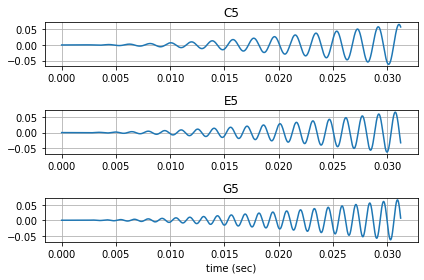

In [6]:
l = 1500
plt.subplot(3,1,1)
plt.plot(t1[:l],C5[:l])
plt.grid('on')
plt.title('C5')
plt.subplot(3,1,2)
plt.plot(t1[:l],E5[:l])
plt.grid('on')
plt.title('E5')
plt.subplot(3,1,3)
plt.plot(t1[:l],G5[:l])
plt.grid('on')
plt.title('G5')
plt.xlabel('time (sec)')
plt.tight_layout()
plt.show()

- np.concatenate를 이용하여 원하는 음을 순서대로 크기를 조절하여 이어 붙여 음악을 완성하여 mydata라는 이름의 변수로 저장합니다.

In [7]:
mydata = np.concatenate([Z,G5,1.5*G5,A5,1.5*A5,G5,G5,0.75*E5,Z,1.5*G5,G5,1.5*E5,E5,1.5*D5,Z,G5,G5,A5,A5,Z,Z])
t = np.linspace(0,len(mydata)/fs,len(mydata))

- 완성된 음악의 파형을 확인하고, Audio함수를 이용하여 소리를 확인합니다.

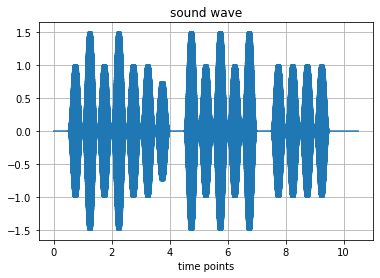

In [8]:
plt.plot(t,mydata)
plt.grid('on')
plt.title("sound wave")
plt.xlabel('time points')
plt.show()

In [9]:
Audio(mydata,rate=fs)

### 나의 음성과 생성한 음악을 합쳐 새로운 wav파일로 저장
- 나의 음성데이터와 생성한 음악데이터를 적절하게 더하여 새로운 wav파일로 저장합니다.
- 소리를 재생하여 확인하면서 배경음악이 적당한 크기로 들어갈 수 있도록 곱해지는 값을 바꾸어 봅시다.
- 저장한 wav파일을 다운로드하여 내 컴퓨터의 음악 재생프로그램을 이용하여 제대로 만들어졌는지의 여부를 확인해 봅시다.

In [16]:
L_min = np.min((len(mydata),len(mywav)))
C = np.mean(np.abs(mywav))
print(L_min, C)

433440 71.23388242894057


In [12]:
# mydata 및 전체에 곱해지는 값들을 자유롭게 변경하며 소리를 확인합니다.
sum_data = 0.5*(1*C*mydata[:L_min] + mywav[:L_min])


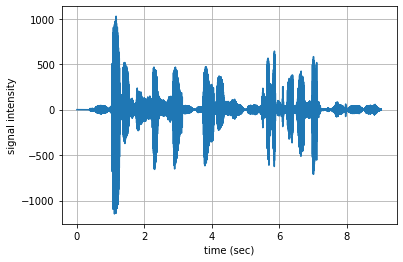

In [13]:
ts = np.arange(0,len(sum_data))/fs
plt.plot(ts,sum_data)
plt.xlabel('time (sec)')
plt.ylabel('signal intensity')
plt.grid('on')
plt.show()

In [14]:
Audio(sum_data,rate=fs)

In [15]:
# 저장되는 파일이름을 각자 원하는 이름으로 변경합니다. 
# sum_data에 나누는 값과 곱하는 값은 자유롭게 변경하여도 됩니다.

wavfile.write('mysum.wav',fs,32*sum_data/np.max(sum_data)) 